In [98]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import natsort
from operator import itemgetter
import matplotlib.pyplot as plt
from matplotlib import lines,patches

import os
import warnings
from files_cleaning import *

import readline # see https://github.com/daniel-acuna/reviewer_assignment/issues/29
%load_ext rpy2.ipython 

# set option seaborn
# sns.set_context("poster",font_scale=1.5)

# avoid the repeated warning, see http://stackoverflow.com/q/35175949/4929813
warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [99]:
###################
#INTERVENTION FILE#
###################

# files
finalissimo='/media/giuseppec/25F62A4E5FEED162/Dropbox/Dropbox/Formit (1)/Survey/Most_updated_questionnaires/160619_FINALISSIMO.xls'
ecoregion='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/countr_ecor_correspondence.csv'
management_codes='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/Sp_man_codes.xls'
species_codes='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/Sp_man_codes.xls'
mach='equipment.xls'

#imports
int_one='PAPER_1_int_1_hours.xls'
int_two='PAPER_1_int_2_harv_amount.xls'


# import and first cleaning
one_in,two_in=initial_clean_interv(int_one,int_two,mach)
#fix duplicates
one_no_dup=clean_dup_rows_int(one_in)
two_no_dup=clean_dup_rows_int(two_in)

#merge the two files
allt=one_no_dup.merge(two_no_dup,how='outer',on=['ID','Respondent_ID','Country', u'Management_system', u'Species_group','interv_num'],indicator=True)

#clean alltogether
alltog=machineries_interventions(allt,mach)

# #import file finalissimo
finalix=clean_finalissimo(finalissimo)

# #merge finalissimo with alltog
merged_fin_all=combine_all_final(alltog,finalix,ecoregion,management_codes,species_codes)

# fro the duplicates rows (like in france) they are combined into 1
combin_bef,duplic=recombine_dup_rows_into_one(merged_fin_all)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
THE ERROR REPORTED FOR FRANCE BELOW HAVE TO BE NEGLECTED, ALREADY CHECKED


/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/graphs_tables/files_cleaning.py:450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_row['Add_equip']=group.iloc[ind_3:ind_4,].iloc[0]['Main_equip'] #this take the value of main eq in the second row
/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/graphs_tables/files_cleaning.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_row['h/ha_2']=group.iloc[ind_3:ind_4,].iloc[0]['h/ha'] #this take the value of main eq in the second row
/media/gi

there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '101', 'secondary felling')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '105', 'secondary felling')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '109', 'final felling')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '57', 'thinning')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '63', 'thinning')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '72', 'thinning')
there are more than 2 dupicates per row, chek:
('F

In [100]:
#######
#TO DO#
#######

def copy_mach_info(comb_df):
#     #fill nan to avoid prob in grouping
#     comb_empt=combined_df.copy(deep=True)
#     comb_empt[keys]=combined_df[keys].fillna('empty')

    #create new empty df
    combined_reduced=pd.DataFrame(columns=comb_df.columns) # old one without adding also the cols with 'Power_(CV)_M', 'Mass_(t)_M_n','Hours_of_use_during_whole_life_M', 'Consumption_(l/h)'
#     combined_reduced=pd.DataFrame(columns=(list(comb_empt.columns)+ ['Power_(CV)_M_2', 'Mass_(t)_M_n_2','Hours_of_use_during_whole_life_M_2', 'Consumption_(l/h)_2'])) #test to add machineries carachteristics
    
#     #groupby
#     grouped = comb_empt.groupby(keys)
#     #check if there are more than 2 duplicates
#     print('THE ERROR REPORTED FOR FRANCE BELOW HAVE TO BE NEGLECTED, ALREADY CHECKED')
    
    for name, group in comb_df.groupby(['Country', 'Management_system', 'Species_group', 'type_of_intervention','Main_equip']):
        if len(group['h/ha'].unique()) ==1 and group['h/ha']:
            print(name)
#         print(len(group))
#         print(len(group['h/ha'].unique()))

#         print(group['h/ha'].unique())
        
# copy_mach_info(combined)

In [101]:
###################
#TO DO...if needed#
###################
def _check_differences(first,second):
    """"""
#     first=merged_fin_all.copy(deep=True)
#     first['compa']
#     second=combined.copy(deep=True)
    df = pd.concat([first,second]).reset_index(drop=True)
    # group by 
    df_gpby = df.groupby(list(df.columns))
    # get index of unique records
    idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
    # filter
    diff=df.reindex(idx).sort_values(['Country', 'Management_system', 'Species_group','interv_num'])
    return diff
# _check_differences(merged_fin_all,combined)

# diff.to_excel('/home/giuseppec/Downloads/diff.xls')
# os.system('xdg-open /home/giuseppec/Downloads/diff.xls')

# convert both ton log and stacked firewood to overbark, better to do direclty in the acces later..MAYBE

In [102]:
def convert_tons_staked(comb):
    """convert the logs, pulp and firewood in tons and the firewood stacked in m3 overbark
    THINK ON WHAT TO DO LATER, MAYBE BETTER TO CALCULATE DIRECTLY IN FINALISSIMO
    
    -FOR STACKED FIREWOOD: data from UNECE joint wood energy enquiry
    tye are for split firewood=0,7 (m3 underbark) and firewood=0,85 (m3 underbark) so I take
    0.8(so consider that a part maight be split)*1.175(as in finalissimo) =.94
    """
    #first do dry then staked in firewood  
    dens=pd.read_excel('general_cleaned.xls',parse_cols=[1,2,3,9]) #takes only dens fresh
    comb=comb.merge(dens,how='left',on=['Country', 'Man_syst', 'Sp_group'])
    #convert t logs to m3
    comb['m3_over_bark_Logs'][(comb['dry_t_Logs'].notnull()) &
                              ((comb['m3_over_bark_Logs'] == 0) | (comb['m3_over_bark_Logs'].isnull()))] =\
                            comb['dry_t_Logs']/ comb['Den_fresh']
    #convert t firewood to m3
    comb['m3_over_bark_Firewood'][(comb['dry_t_Firewood'].notnull()) &
                          ((comb['m3_over_bark_Firewood'] == 0) | (comb['m3_over_bark_Firewood'].isnull()))] =\
                        comb['dry_t_Firewood']/ comb['Den_fresh']
        
    #convert stacked firewood to m3
    comb['m3_over_bark_Firewood'][(comb['Stacked_cubic_meter_Firewood'].notnull()) &
                          ((comb['m3_over_bark_Firewood'] == 0) | (comb['m3_over_bark_Firewood'].isnull()))] =\
                        comb['Stacked_cubic_meter_Firewood']*0.94
    comb.drop('Den_fresh',axis=1,inplace=True)
    return comb

combined=convert_tons_staked(combin_bef)

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Export for paper

In [103]:
export_file(combined,
            '/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/ELCIFO/database/interventions.xls',
    ['Country','Man_syst','Sp_group','Man_syst_code','Sp_gr_code','FU','interv_num', 'Timing_of_intervention', 'type_of_intervention', 'Specie(s)_concerned_by_intervention',
    'Pre_int_stock', 'Pre_int_BA', 
#      'Intensity_of_intervention', #not to include
       
    'Main_equip','Power_(CV)_M', 'Mass_(t)_M_n','Consumption_(l/h)', 'Hours_of_use_during_whole_life_M','h/ha', 'm3/h','fresh_t/h',
    'Add_equip','Power_(CV)_M_2','Mass_(t)_A', 'Consumption_(l/h)_2','Hours_of_use_during_whole_life_A','h/ha_2','m3/h_2', 'fresh_t/h_2',
    'third_equip','Power_(CV)_M_3','Mass_(t)_M_n_3','Hours_of_use_during_whole_life_M_3','Consumption_(l/h)_3','h/ha_3','m3/h_3','fresh_t/h_3',

    #to be deleted later
#     'second_additional_equipment',

    'input_1', 'active_pr1', 'Amount_1', 'input_2', 'active_pr2', 'Amount_2',
    'Stemwood', 'Stem_and_residues', 'Stumps',
    'm3_over_bark_Logs', 'm3_under_bark_Logs', 'dry_t_Logs',
    'm3_over_bark_Firewood', 'm3_under_bark_Firewood', 'dry_t_Firewood',
    'm3_over_bark_pulp', 'm3_under_bark_pulp','dry_t_pulp',
    'Stacked_cubic_meter_Firewood', 'm3_chips',
    'Loose_cubic_meter_chips', 'dry_t_chips','Loose_cubic_meter_stumps/ha', 'dry_t_chips_stumps'],
            
    ['Country','Man_syst','Sp_group','Man_syst_code','Sp_gr_code','FU','interv_num', 'Timing_of_interv', 'type_of_interv', 'Sp_interv',
    'Pre_int_stock', 'Pre_int_BA', 
#      ' Intens_inter', #not to include
        
    'Equip_1','Power_1', 'Mass_1','Consum_1', 'Hrs_use_life_1','h/ha_1', 'm3/h_1','fresh_t/h_1',
    'Equip_2','Power_2','Mass_2', 'Consum_2','Hrs_use_life_2','h/ha_2','m3/h_2', 'fresh_t/h_2',
    'Equip_3','Power_3','Mass_3','Consum_3','Hrs_use_life_3','h/ha_3','m3/h_3','fresh_t/h_3',
     
    #to be deleted lated
#     'second_additional_equipment',
       
    'input_1', 'active_pr1', 'Amount_1', 'input_2', 'active_pr2', 'Amount_2',
    'Stem', 'Stem_and_res', 'Stumps',
    'm3_ob_Logs', 'm3_ub_Logs', 'dry_t_Logs', 'm3_ob_Firewood', 'm3_ub_Firewood', 'dry_t_Firewood','m3_ob_pulp', 'm3_ub_pulp','dry_t_pulp',
    'St_m3_Firewood', 'm3_chips',
    'Loose_m3_chips', 'dry_t_chips', 'Loose_m3_stumps/ha', 'dry_t_stumps'])


# Filter low quality data

In [104]:
# print(combined[['Country', 'Man_syst', 'Sp_group']].drop_duplicates().shape[0])
combined=filter_pedigre(combined,'Pedigree_matrix_GC.xls',['A','B'])
# print(combined[['Country', 'Man_syst', 'Sp_group']].drop_duplicates().shape[0])

In [8]:
%%R

# the two R functions used to create polar histogram and combine them into multiplot below in function multi_polar

plot_gg <- function(polar_hist) {
    library(phenotypicForest)
    p <-polarHistogram(polar_hist, 
            columnNames = c("family"="Man_syst_code","item"="Sp_gr_code", "score"="Main_equip","value"="count"),
              familyLabel=TRUE,
              innerRadius = 0.3,
              outerRadius = 1,
              alphaStart = -0.1,
              circleProportion = 0.9,
              guides = c(20, 40, 80))
    return(p)
}

multiplot_gg <- function(list_pol_hist) {
        library(ggplot2)
        library(easyGgplot2)
        ggplot2.multiplot(plot_gg(list_pol_hist[[1]]),
                          plot_gg(list_pol_hist[[2]]),
                          plot_gg(list_pol_hist[[3]]),
                          plot_gg(list_pol_hist[[4]]),
                          plot_gg(list_pol_hist[[5]]),
                          cols=3)
        }
list_pol_hist <- list()

In [9]:
def multi_polar(combined):
    """function that takes the df combined and using the 2 R functions above construct the 5 polar histograms (one per ecoregion)
    for chainsaw and and harvested used in the different management and species groups
    
    ####OBVIOUSLY THERE ARE SOME MISSING IN MERGING ON FINALISSIMO (like building game fence protection)
    
    """
    

    bubble=combined[['Ecore_WP5', "Man_syst_code",'Sp_gr_code','Main_equip',
                     #'Add_equip', Think on what to do with it
                     'intervention']]

#     list_pol_hist=[]
#     for eco in list(bubble.Ecore_WP5.unique()):

#         filt_mach=['chainsaw','harvester','feller buncher']
#         filt_int=['final felling','thinning']

#         filtered=bubble[bubble.Main_equip.isin(filt_mach) & bubble.intervention.isin(filt_int) & bubble.Ecore_WP5.isin([eco])]

#         polar_hist=pd.DataFrame({'count' : filtered.groupby(['Man_syst_code','Sp_gr_code','Main_equip']).size()}).reset_index()

#         %R -i polar_hist
#         list_pol_hist.append(polar_hist)

    for i,eco in enumerate(list(bubble.Ecore_WP5.unique())):

        filt_mach=['chainsaw','harvester','feller buncher']
        filt_int=['final felling','thinning']

        filtered=bubble[bubble.Main_equip.isin(filt_mach) & bubble.intervention.isin(filt_int) & bubble.Ecore_WP5.isin([eco])]

        polar_hist=pd.DataFrame({'count' : filtered.groupby(['Man_syst_code','Sp_gr_code','Main_equip']).size()}).reset_index()

        %R -i polar_hist
        %R -i i
        %R list_pol_hist[[i+1]] <- polar_hist
        
    
    %R -w 40 -h 20 -u cm multiplot_gg(list_pol_hist)
    

In [10]:
#create multiple polar histograms
# multi_polar(combined)

### the two belwo make one unique graph for combining sp.gr and man syst (what was this??))

# machinery used

In [11]:
def filter_data_machine(combined_df):
    """function that put the data in a format to produce the graph i.e. all the machinery used either if first, 2nd or 3rd are concatenated in one col only for 
    the three machineries used in felling or harvesting"""
    #take main equipment (alteady checked intervention and is fine acseu also if not updated the new rows contains only planting and other non relevant things)
    sp_man=combined_df[['Ecore_WP5', "Man_syst_code",'Sp_gr_code','Main_equip','FU','intervention']]

    #append the additional equiment also
    add=combined_df[['Ecore_WP5', "Man_syst_code",'Sp_gr_code','Add_equip','FU',
                     'intervention']]
    add.rename(columns={'Add_equip':'Main_equip'},inplace=True)
    sp_man=sp_man.append(add,ignore_index=True)

    #append the third equiment also
    th=combined_df[['Ecore_WP5', "Man_syst_code",'Sp_gr_code','third_equip','FU',
                     'intervention']]
    th.rename(columns={'third_equip':'Main_equip'},inplace=True)
    sp_man=sp_man.append(th,ignore_index=True)
    
    #change name
    sp_man.rename(columns={'Main_equip':'machine'},inplace=True)

    #filter only machinery and internvetion needed
    filt_mach=['chainsaw','harvester','feller buncher']
    filt_int=['final felling','thinning']
    filtered=sp_man[sp_man.machine.isin(filt_mach) & sp_man.intervention.isin(filt_int)]

    return pd.DataFrame({'count' : filtered.groupby(['Ecore_WP5','FU','machine']).size()}).reset_index()
mach_fell=filter_data_machine(combined)

%R -i mach_fell # send to R

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: ggplot2

  res = super(Function, self).__call__(*new_args, **new_kwargs)


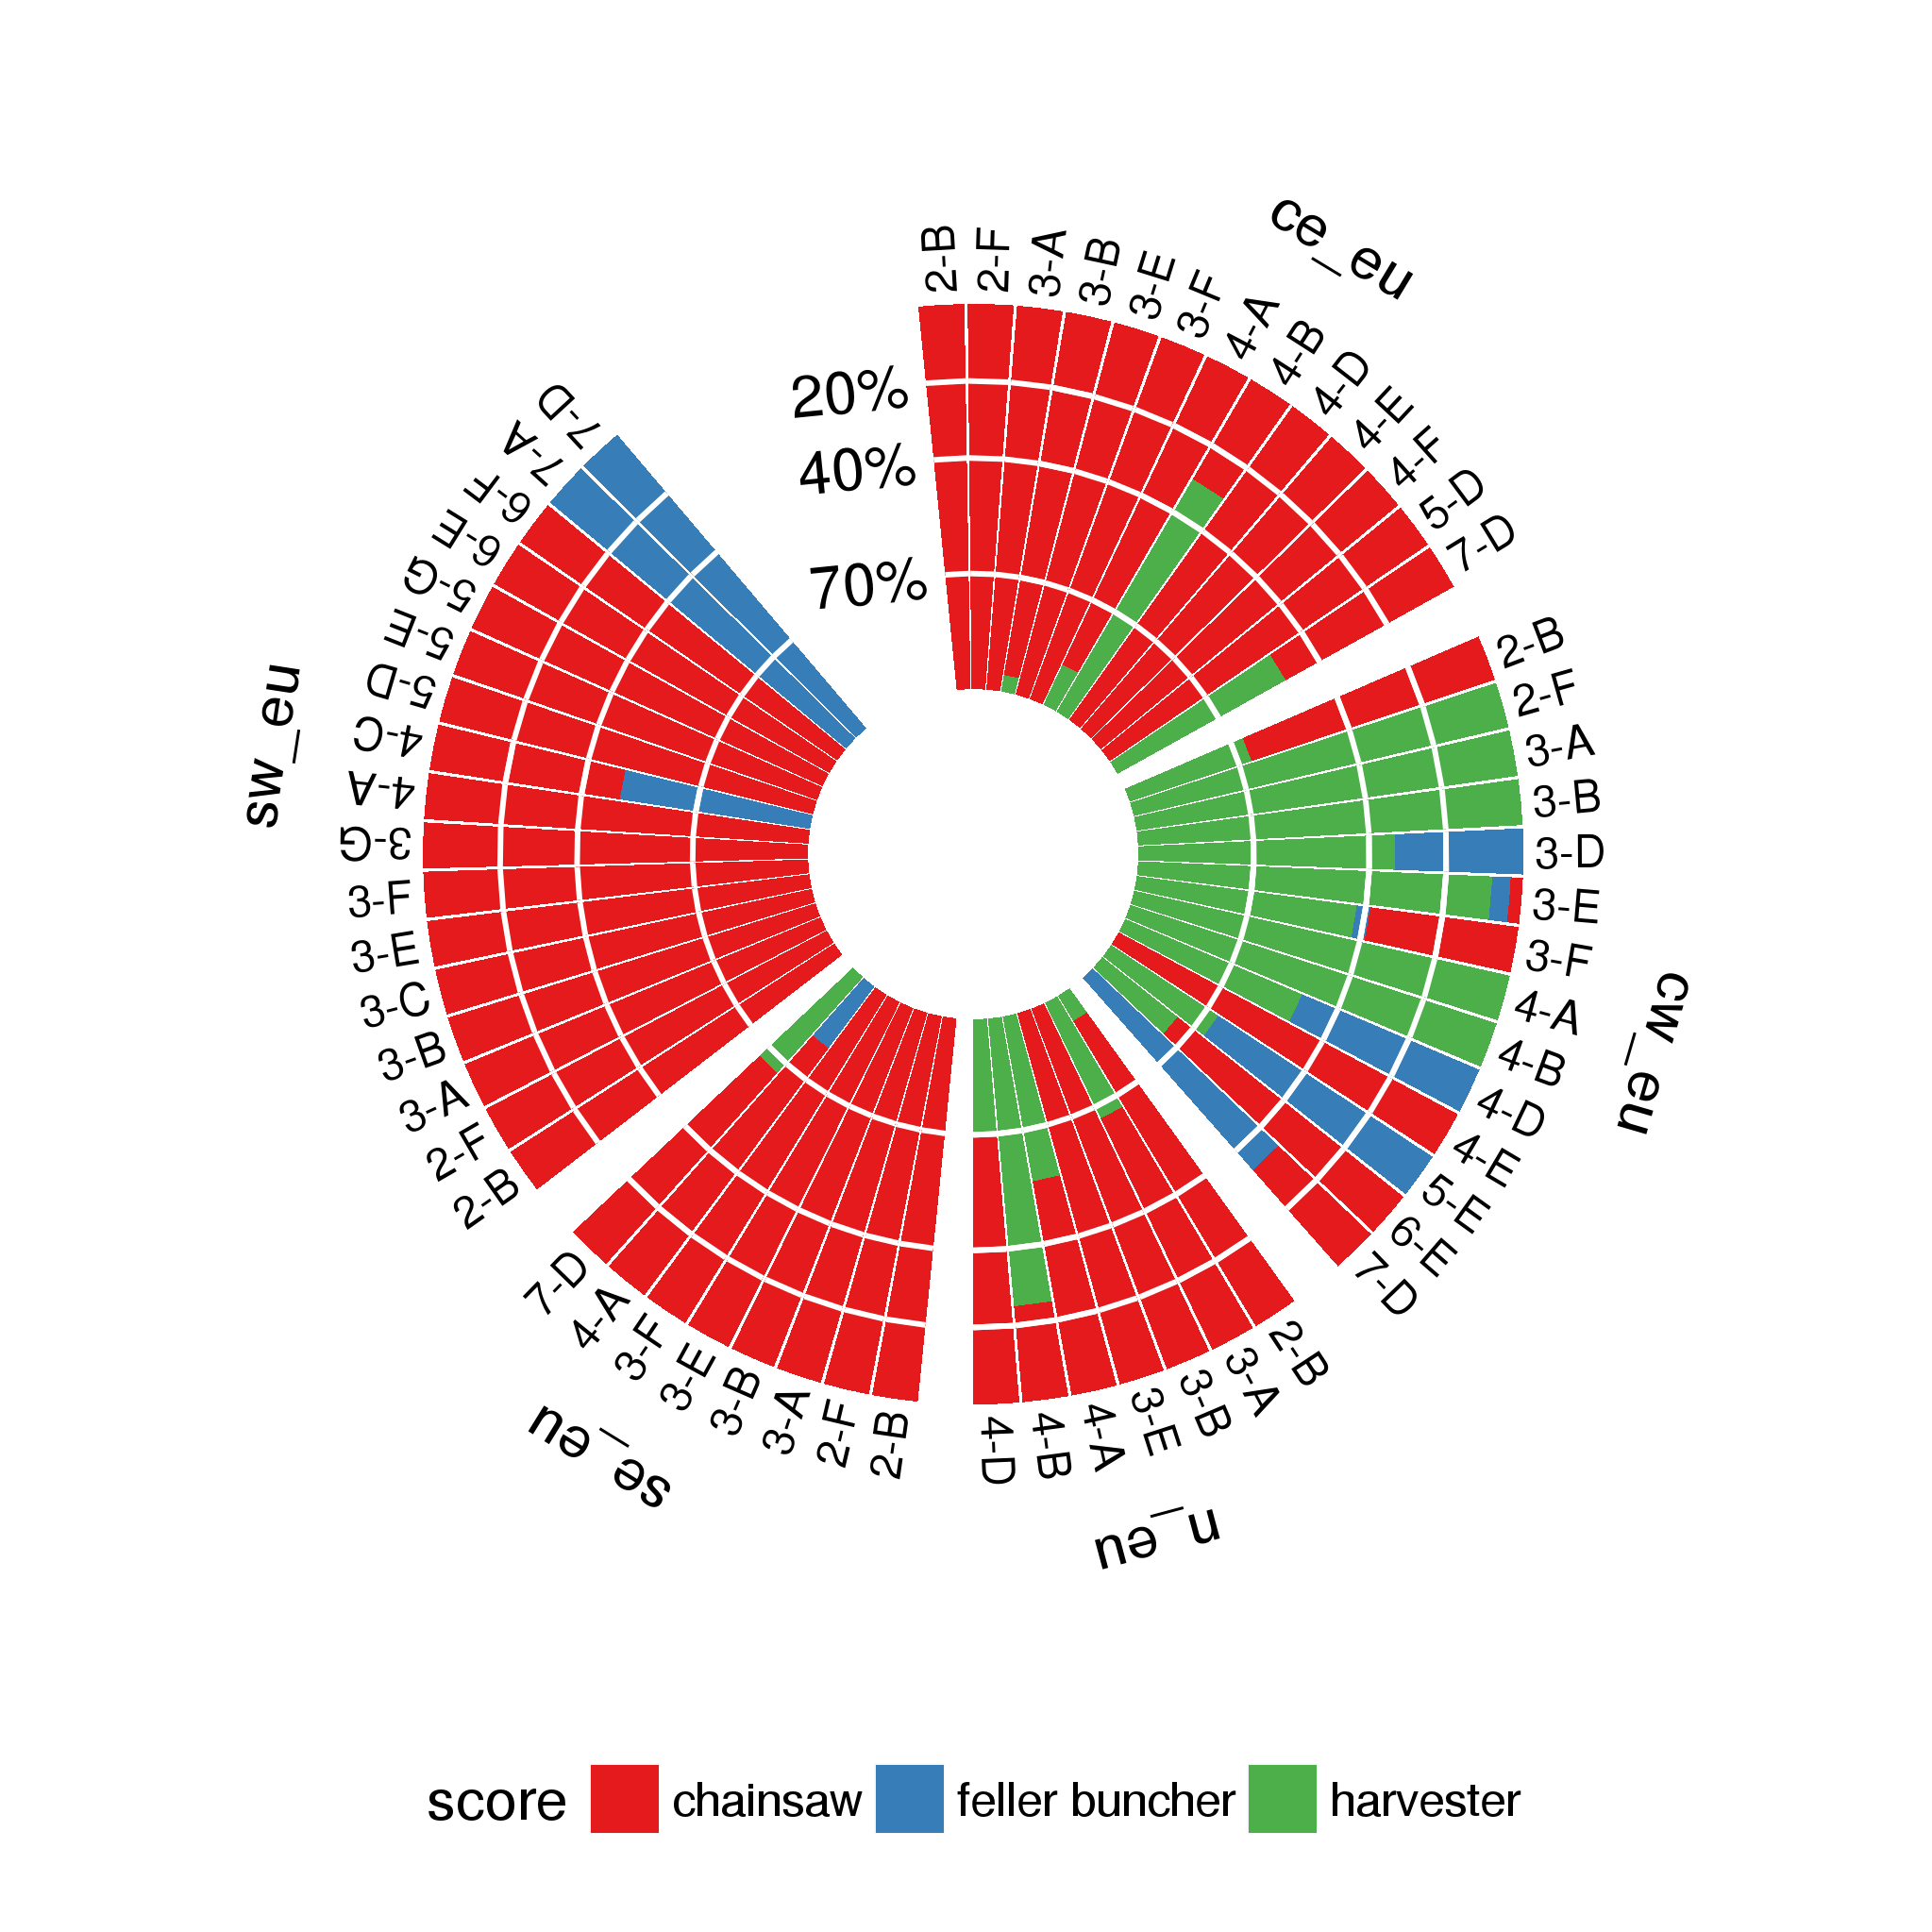

In [12]:
%%R -w 13 -h 13 -u cm --res 400 --p 10 #to change the graph resolution, see https://ipython.org/ipython-doc/2/config/extensions/rmagic.html

#this cell plot machineries
library(easyGgplot2)
library(phenotypicForest)
# theme_set(theme_gray(base_size = 15)) #change size font legend
p<-polarHistogram(mach_fell, 
                  columnNames = c("family"="Ecore_WP5", "item"="FU","score"="machine","value"="count"),#by ecoreg
                  
#                   columnNames = c("family"="FU","item"="Ecore_WP5","score"="machine","value"="count"),#by FU
                  
                  familyLabel=TRUE,
                  spaceItem=0.07,

#                   normalised = FALSE,
                  innerRadius = 0.3,
                  outerRadius = 1,
                  alphaStart = -0.1,
                  circleProportion = 0.92,
                  direction=1, #1 from the outside to the centre, 2 the opposite

                  guides = c(20, 40, 70))


p <-p + theme(legend.position="bottom") #for easyggplot put legend at the bottom

# print(p)
plot(p)

# number thinnings

In [13]:
reg_coun=combined[['Country','Ecore_WP5', "FU",'intervention']]
reg_coun=reg_coun[reg_coun['intervention']=='thinning']

reg_coun=reg_coun[['Country','Ecore_WP5', "FU",'intervention']].groupby(['Country','Ecore_WP5', "FU"]).size()
reg_coun=reg_coun.reset_index()
reg_coun.sort_values(by=0,ascending=False)

,Country,Ecore_WP5,FU,0
58,Netherlands,cw_eu,3-D,27
60,Netherlands,cw_eu,3-F,25
10,Belgium,cw_eu,4-E,25
31,Germany,cw_eu,3-E,23
59,Netherlands,cw_eu,3-E,20
57,Netherlands,cw_eu,3-B,17
61,Netherlands,cw_eu,4-A,16
33,Germany,cw_eu,4-A,16
28,Germany,cw_eu,3-A,16
32,Germany,cw_eu,3-F,15


# productivity

In [14]:
def filter_productivity(combined_df): 
    """function that put the data in a format to produce the graph i.e. all the productivities either if first, 2nd or 3rd are concatenated in one col only for 
    the three machineries used in felling or harvesting"""
    
    #take main equipment productivities (alteady checked intervention and is fine acseu also if not updated the new rows contains only planting and other non relevant things)
    main_prod=combined[['Country','Ecore_WP5', "Man_syst_code",'Sp_gr_code','FU','Main_equip','m3/h','intervention']]
                    
    #append the additional equiment productivities
    add_prod=combined[['Country','Ecore_WP5', "Man_syst_code",'Sp_gr_code','FU','Add_equip','m3/h_2','intervention']]
    add_prod.rename(columns={'Add_equip':'Main_equip','m3/h_2':'m3/h'},inplace=True)
    main_prod=main_prod.append(add_prod,ignore_index=True)
                    
    #append the additional equiment productivities
    th_prod=combined[['Country','Ecore_WP5', "Man_syst_code",'Sp_gr_code','FU','third_equip','m3/h_3','intervention']]
    th_prod.rename(columns={'third_equip':'Main_equip','m3/h_3':'m3/h'},inplace=True)
    main_prod=main_prod.append(th_prod,ignore_index=True)   
    
    #change name
    main_prod.rename(columns={'Main_equip':'machine'},inplace=True)

    #filter only machinery and internvetion needed
    filt_mach=['chainsaw','harvester','feller buncher']
    filt_int=['final felling','thinning']
    filt_prod=main_prod[main_prod.machine.isin(filt_mach) & main_prod.intervention.isin(filt_int)]
    #sort value by man and sp group
    return filt_prod.sort_values('FU')

mach_prod=filter_productivity(combined)

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


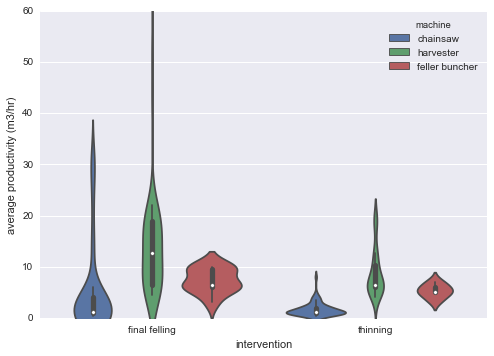

In [15]:
# calculate avg productivity by FU, country, ecoregion, internvetion and equipment
mach_avg_coun=mach_prod.groupby(['Country','Ecore_WP5', 'FU','machine','intervention'])['m3/h'].agg(['mean'])
mach_avg_coun=mach_avg_coun.rename(columns={'mean':'average productivity (m3/hr)'}).reset_index()
# mach_avg_coun.sort_values('count',ascending=False)
mach_avg_coun


plt.ylim(0, 60) #to start from zero
# sns.set_style("whitegrid")
ax = sns.violinplot(x="intervention", y="average productivity (m3/hr)", hue="machine", data=mach_avg_coun) #GOOD ONE!!
#other tests
# ax = sns.swarmplot(x="intervention", y="average productivity (m3/hr)",hue="machine", data=mach_avg_coun)
# ax = sns.boxplot(x="intervention", y="average productivity (m3/hr)",hue="machine", data=mach_avg_coun)
# ax = sns.violinplot(x="machine", y="average productivity (m3/hr)",hue="intervention",split=True, data=mach_avg_coun)#,inner="quartile")#, bw=.5 intervention

In [16]:
mach_avg_coun.groupby('machine')['average productivity (m3/hr)']

# max and min rotation
# rotat.sort_values('Rotation',ascending=0).head()
mach_avg_coun


,Country,Ecore_WP5,FU,machine,intervention,average productivity (m3/hr)
0,Austria,cw_eu,2-B,chainsaw,final felling,3.000000
1,Austria,cw_eu,3-B,harvester,final felling,6.000000
2,Austria,cw_eu,3-B,harvester,thinning,6.000000
3,Austria,cw_eu,3-E,chainsaw,final felling,3.000000
4,Austria,cw_eu,3-E,harvester,thinning,6.000000
5,Austria,cw_eu,3-F,chainsaw,final felling,3.000000
6,Austria,cw_eu,3-F,harvester,thinning,6.000000
7,Austria,cw_eu,4-A,harvester,final felling,6.000000
8,Austria,cw_eu,4-A,harvester,thinning,6.000000
9,Austria,cw_eu,4-B,harvester,final felling,6.000000


In [17]:
#to check the outliers
# mach_avg_coun.to_excel('/home/giuseppec/Downloads/mach_avg_coun.xls')
# os.system('xdg-open /home/giuseppec/Downloads/mach_avg_coun.xls')

# harvesting volumes

In [18]:
harv=combined[['Country','Ecore_WP5', "FU",'Man_syst_code','Sp_gr_code','type_of_intervention','intervention',
'm3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood', 
'm3_under_bark_Logs','m3_under_bark_pulp','m3_under_bark_Firewood',
'Loose_cubic_meter_chips','Stacked_cubic_meter_Firewood',
'm3_chips','Loose_cubic_meter_stumps/ha',
'dry_t_Logs','dry_t_pulp','dry_t_Firewood', 'dry_t_chips','dry_t_chips_stumps']]


# harv=combined[['Country','Ecore_WP5', "FU",'type_of_intervention','intervention',
               
# 'm3_over_bark_Logs','m3_under_bark_Logs','dry_t_Logs',
# 'm3_over_bark_pulp','m3_under_bark_pulp','dry_t_pulp',
# 'm3_over_bark_Firewood','m3_under_bark_Firewood','dry_t_Firewood', 'Stacked_cubic_meter_Firewood',           
# 'Loose_cubic_meter_chips', 'm3_chips','dry_t_chips',
# 'dry_t_chips_stumps',
# 'Loose_cubic_meter_stumps/ha'           
# ]]

#for logs firewood and pulp have to thake overbark, for chips in most cases m3_chips only for beglium Loose_cubic_meter_chips

# harv.to_excel('/home/giuseppec/Downloads/harv_2.xls')

In [19]:
#filter only thin and fellings
harv_no_plan=harv[harv.intervention.isin(['thinning', 'final felling'])]
harv_no_plan=harv_no_plan.sort_values('FU')
# harv_no_plan=harv_no_plan.groupby(['Country','FU','intervention']).sum()
# harv_no_plan.reset_index(inplace=True)

In [20]:
#overbark thinning adn final felling summed graph thest
#only cols needed
sum_th_fel=(harv_no_plan[['Ecore_WP5','FU','m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood', 'Country','intervention']])#'Man_syst_code','Sp_gr_code',

#calculate total removals
sum_th_fel['tot']=sum_th_fel[['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']].sum(axis=1)

##number of thin and fell and tota wood harvested by assortment
# gr_th_fel=gr_th_fel.groupby(['FU','Country','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood','tot'].agg(['sum','size']).reset_index()

#tot harvested wood by country, FU, country, intervention
gr_th_fel=sum_th_fel.groupby(['Ecore_WP5','FU','Country','intervention']).sum().reset_index()

print(gr_th_fel.shape)
# gr_th_fel.head()

(230, 8)


/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


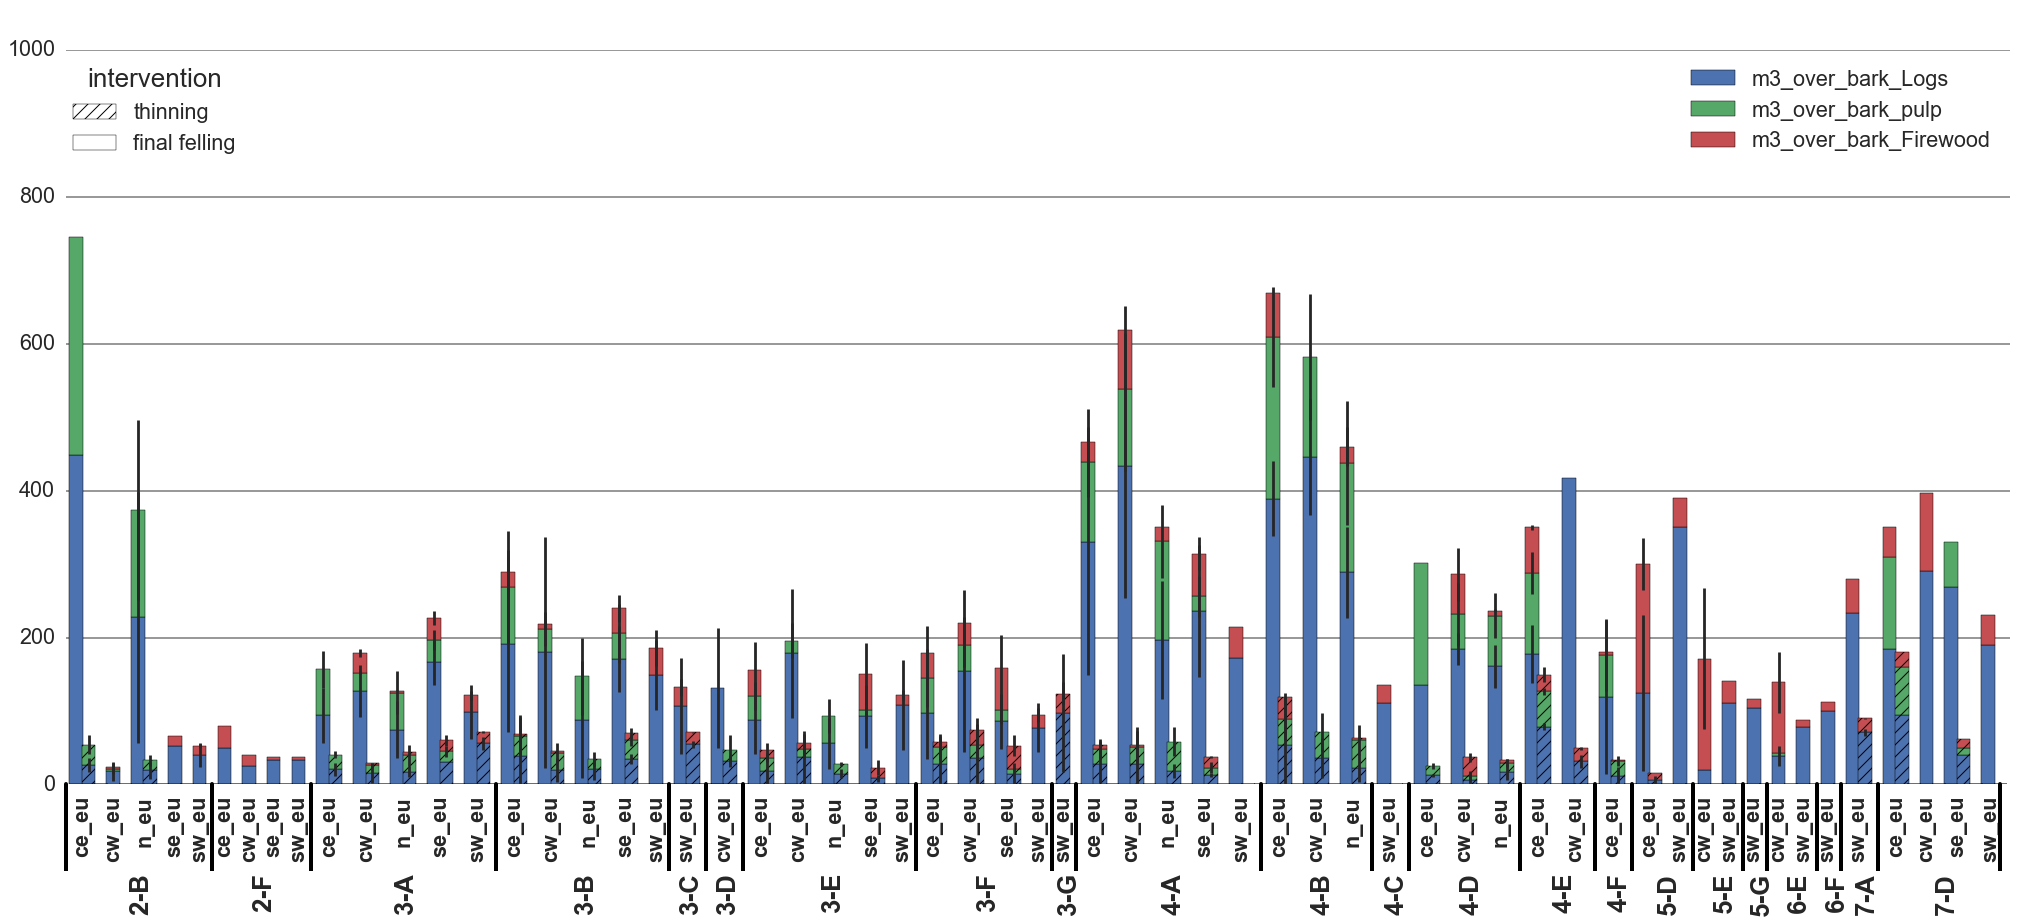

In [92]:
#######
#BY FU#
#######

# plt.rcParams['errorbar.capsize']=0.01
# ,capsize=4,capthick=1)

# eco_div_norm=None


sns.set_context("poster",font_scale=1.35)


#create zero rows for space betewen FU and concat 
zeros=gr_th_fel[['Ecore_WP5','FU']].drop_duplicates()
zeros['intervention']='zero'
zeros['m3_over_bark_Logs']=np.nan
zeros['m3_over_bark_pulp']=np.nan
zeros['m3_over_bark_Firewood']=np.nan
add_zero=pd.concat([sum_th_fel,zeros])

#group by eco,FU and interventions
gr=add_zero.groupby(['FU','Ecore_WP5','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()


#create x labels names
ind=[x for x in gr.groups]
ind.sort()

    #crate the empty name for zeros in FU
zero_lab=['' if x[2]=='zero' else x[1] for x in ind]

    # convert duplicates fu names in empty
x_lab=[]
for i,x in enumerate(zero_lab):
    if x==zero_lab[i-1]:
        x_lab.append('')
    else:
        x_lab.append(x)

#calculate means and stdevs
means = gr.mean()
errors = gr.std()


# Plot
fig, ax = plt.subplots()
    #create axes and make withe
ax = fig.add_axes( [.05, .1, .9, .85] )
ax.patch.set_facecolor('white') # change background color see http://stackoverflow.com/a/23907866/4929813


plt.ylim(0.1, 1000) # to not show the small bar in the spaces (i.e. zeros) see http://stackoverflow.com/a/13983540/4929813


p=means.plot.bar(stacked=True,yerr=errors,width=1.1, sort_columns=True,ax=ax,figsize=(30, 12),grid="off") #with yerr can add the bars


# hatch thinnings bars
num=3 # dunno why need to start from 3 and not 1

st=pd.DataFrame(means.stack(dropna=False)).reset_index() #stack 
st.level_3.replace({'m3_over_bark_Logs':'1m3_over_bark_Logs','m3_over_bark_pulp':'2m3_over_bark_pulp','m3_over_bark_Firewood':'3m3_over_bark_Firewood'}
                   ,inplace=True) #change name type wood to put them in correct order
st.sort_values(['level_3','FU','Ecore_WP5','intervention'],inplace=True)

for name,row in st.iterrows():
    if pd.notnull(row[0]) and row['intervention']=='thinning':
            ax.get_children()[num].set_hatch('//')
    num+=1
    

#change xticks names and position
    #calculate new position
xt_pos=list(zip(x_lab,ax.get_xticks()))
new_pos=[]
for i in range(0,len(xt_pos)-2):
    if (xt_pos[i][0]) != '' and (xt_pos[i+1][0]) == '' and (xt_pos[i+2][0]) == '' :
        new_pos.append(i+0.5)
    else:
        new_pos.append(i)
new_pos.append(len(xt_pos)-1.8) #deal with last one
        
ax.set_xticks(new_pos) #change position x
ax.set_xticklabels(x_lab,weight='bold') #change labels x
ax.set_xlabel('') #remove x-axes name

##add FU names
    # get ecoregion names
eco=list(set([x[0] for x in ind]))
eco.sort()


#     calculate position lines (done manually in div below to adjust minor things, but needed in this position)
len_eco=add_zero[['Ecore_WP5','FU','intervention']].drop_duplicates().groupby('FU') #calc number col
eco_div=[(1/len(gr)*len(v)) for k,v in len_eco] #check distance change
eco_div_norm=[sum(eco_div[:k]) for k in range(1+len(eco_div))] #normalize to 1
eco_div_norm= [0.001]+eco_div_norm[1:-1]+[0.999] #to adjust the 2 extremes


    # calculate position text    
pos_groups=[]
for i in range(0, len(eco_div_norm)-1):
    pos_groups.append(((eco_div_norm[i]+eco_div_norm[i+1])/2))
    #add
for (name,pos) in zip(eco,pos_groups):
    plt.annotate(name, (0,0), (((pos-0.0065)), -0.12), xycoords='axes fraction', textcoords='axes fraction', weight="bold",va='top',rotation=90) # add text somewhere (this is on the axes for ecoregion)


# #add main divisory bar for FU from http://calebmadrigal.com/draw-lines-with-matplotlib/
    #create second axes
ax2 = plt.axes([0.049,0,0.897,1], axisbg=(1,1,1,0))#create axes2
ax2.set_xticklabels([]);ax2.set_yticklabels([]);ax2.grid(False) #do not show ticks second axes and grid

    #add lines
for div in eco_div_norm:
    line = lines.Line2D((div,div), (0,0.1), linewidth=4, color='black') #create the line
    ax2.add_line(line)

# add second legend
# import matplotlib.patches as mpatches
thi = patches.Patch(facecolor='white',edgecolor='black',label='thinning',hatch='//')
fel = patches.Patch(facecolor='white',edgecolor='black', label='final felling')
ax2.legend(handles=[thi,fel], loc=[0,0.82], title='intervention')

# add horizontal grids
ax.yaxis.grid(True,color='grey')
# ax.errorbar(capsize=2)
plt.gcf().subplots_adjust(bottom=0.30)#,hspace = 0, wspace = 0) #to avoid that the bottom is cutted during the export

# plt.savefig('/home/giuseppec/Downloads/thin_fell_error.png', dpi=400)
# plt.savefig('/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/manuscript/pictures/thin_fell_error2.png', dpi=400, bbox_inches='tight') #bbox_inches to remove extra white space in immage see http://stackoverflow.com/a/9295472/4929813

In [97]:
perc=means.copy(deep=True)
perc['tot']=perc.sum(axis=1)
# perc.columns[:3]
for c in perc.columns[:3]:
    perc[c+'_perc']=perc[c]/perc['tot']
# for x
perc


m3_over_bark_Logs  m3_over_bark_pulp  \
FU  Ecore_WP5 intervention                                          
2-B ce_eu     final felling         448.000000         298.000000   
              thinning               26.250000          27.800000   
              zero                         NaN                NaN   
    cw_eu     final felling          17.716667           4.000000   
              zero                         NaN                NaN   
    n_eu      final felling         227.666667         146.000000   
              thinning               19.600000          13.200000   
              zero                         NaN                NaN   
    se_eu     final felling          52.325581           0.000000   
              zero                         NaN                NaN   
    sw_eu     final felling          40.697674           0.000000   
              zero                         NaN                NaN   
2-F ce_eu     final felling          50.000000                NaN   
              zero                         NaN                NaN   
    cw_eu     final felling          25.000000           0.000000   
              zero                         NaN                NaN   
    se_eu     final felling          33.333335           0.000000   
              zero                         NaN                NaN   
    sw_eu     final felling          33.333335           0.000000   
              zero                         NaN                NaN   
3-A ce_eu     final felling          94.000000          62.666667   
              thinning               20.500000          20.166667   
              zero                         NaN                NaN   
    cw_eu     final felling         127.400000          25.000000   
              thinning               15.590909          11.291667   
              zero                         NaN                NaN   
    n_eu      final felling          74.611538          50.425000   
              thinning               17.643333          22.038462   
              zero                         NaN                NaN   
    se_eu     final felling         166.666667          30.000000   
...                                        ...                ...   
5-D ce_eu     final felling         125.000000                NaN   
              thinning                6.000000                NaN   
              zero                         NaN                NaN   
    sw_eu     final felling         350.000000           0.000000   
              zero                         NaN                NaN   
5-E cw_eu     final felling          20.000000                NaN   
              zero                         NaN                NaN   
    sw_eu     final felling         111.111107                NaN   
              zero                         NaN                NaN   
5-G sw_eu     final felling         104.761910           0.000000   
              zero                         NaN                NaN   
6-E cw_eu     final felling          38.512500           4.700000   
              zero                         NaN                NaN   
    sw_eu     final felling          78.703701           0.000000   
              zero                         NaN                NaN   
6-F sw_eu     final felling         100.000005           0.000000   
              zero                         NaN                NaN   
7-A sw_eu     final felling         233.333340           0.000000   
              thinning               71.111113           0.000000   
              zero                         NaN                NaN   
7-D ce_eu     final felling         185.000000         125.000000   
              thinning               95.000000          65.000000   
              zero                         NaN                NaN   
    cw_eu     final felling         290.000000                NaN   
              zero                         NaN                NaN   
    se_eu     final felling

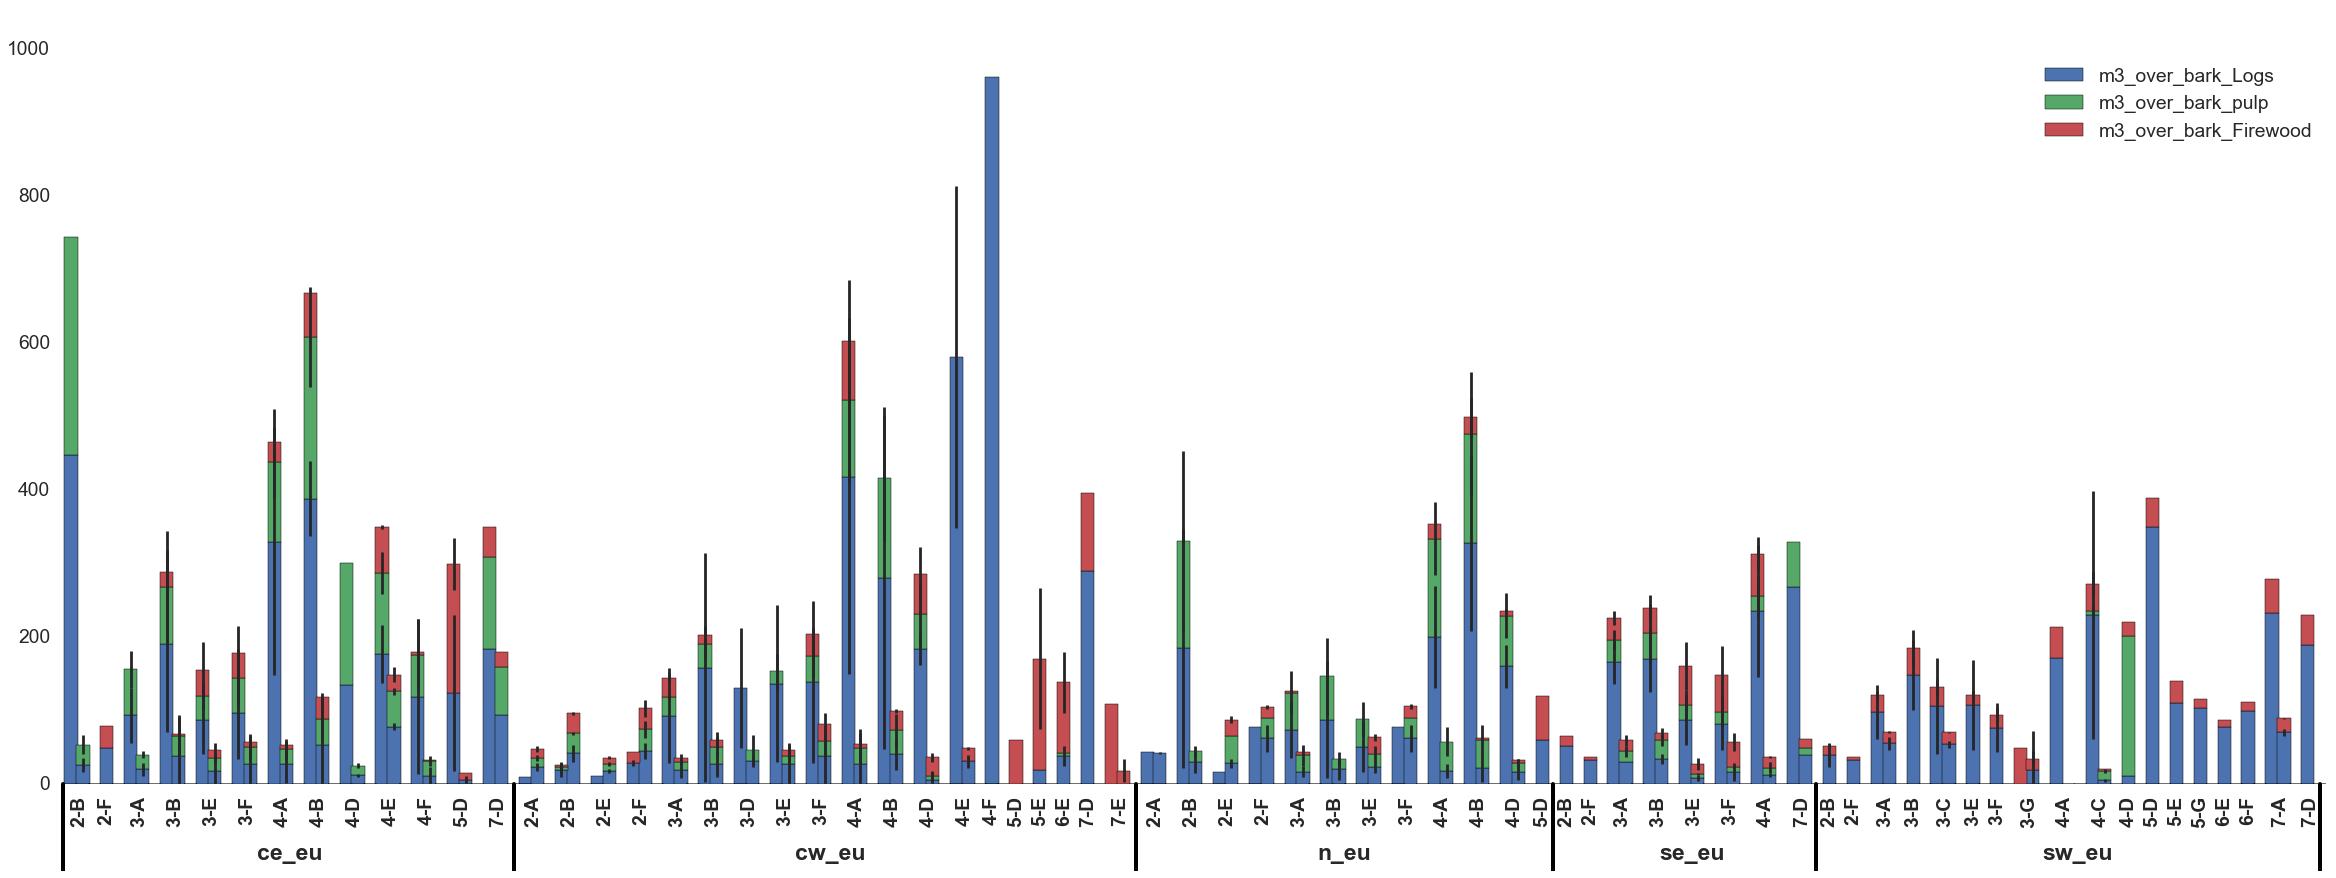

In [20]:
###########
#BY ECOREG#
###########
eco_div_norm=None

sns.set_context("poster",font_scale=1.2)


#create zero rows for space betewen FU and concat 
zeros=gr_th_fel[['Ecore_WP5','FU']].drop_duplicates()
zeros['intervention']='zero'
zeros['m3_over_bark_Logs']=np.nan
zeros['m3_over_bark_pulp']=np.nan
zeros['m3_over_bark_Firewood']=np.nan
add_zero=pd.concat([sum_th_fel,zeros])

#group by eco,FU and interventions
gr=add_zero.groupby(['Ecore_WP5','FU','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()


#create x labels names
ind=[x for x in gr.groups]
ind.sort()

    #crate the empty name for zeros in FU
zero_lab=['' if x[2]=='zero' else x[1] for x in ind]

    # convert duplicates fu names in empty
x_lab=[]
for i,x in enumerate(zero_lab):
    if x==zero_lab[i-1]:
        x_lab.append('')
    else:
        x_lab.append(x)


#calculate means and stdevs
means = gr.mean()
errors = gr.std()


# Plot
fig, ax = plt.subplots()
    #create axes and make withe
ax = fig.add_axes( [.05, .1, .9, .85 ] )
ax.patch.set_facecolor('white') # change background color see http://stackoverflow.com/a/23907866/4929813



plt.ylim(0.1, 1000) # to not show the small bar in the spaces (i.e. zeros) see http://stackoverflow.com/a/13983540/4929813
p=means.plot.bar(stacked=True,yerr=errors,width=1.1, sort_columns=True,ax=ax,figsize=(35, 12),grid="off") #with yerr can add the bars


#change xticks names and position
    #calculate new position
xt_pos=list(zip(x_lab,ax.get_xticks()))
new_pos=[]
for i in range(0,len(xt_pos)-2):
    if (xt_pos[i][0]) != '' and (xt_pos[i+1][0]) == '' and (xt_pos[i+2][0]) == '' :
        new_pos.append(i+0.7)
    else:
        new_pos.append(i)
new_pos.append(len(xt_pos)-1.8) #deal with last one
        
ax.set_xticks(new_pos) #change position x
ax.set_xticklabels(x_lab,weight='bold') #change labels x
ax.set_xlabel('') #remove x-axes name

##add ecoregion names
    # get ecoregion names
eco=list(set([x[0] for x in ind]))
eco.sort()


#     calculate position lines (done manually in div below to adjust minor things, but needed in this position)
len_eco=add_zero[['Ecore_WP5','FU','intervention']].drop_duplicates().groupby('Ecore_WP5') #calc number col
eco_div=[(1/len(gr)*len(v)) for k,v in len_eco] #check distance change
eco_div_norm=[sum(eco_div[:k]) for k in range(1+len(eco_div))] #normalize to 1
eco_div_norm= [0.001]+eco_div_norm[1:-1]+[0.999] #to adjust the 2 extremes



    # calculate position text
pos_groups=[]
for i in range(0, len(eco_div_norm)-1):
    pos_groups.append(((eco_div_norm[i]+eco_div_norm[i+1])/2))
    #add
for (name,pos) in zip(eco,pos_groups):
    plt.annotate(name, (0,0), (((pos-0.015)), -0.08), xycoords='axes fraction', textcoords='axes fraction', weight="bold",va='top',rotation=0) # add text somewhere (this is on the axes for ecoregion)


# #add main divisory bar for ecoregion from http://calebmadrigal.com/draw-lines-with-matplotlib/
    #create second axes
ax2 = plt.axes([0.047,0,.9,1], axisbg=(1,1,1,0))#create axes2
ax2.set_xticklabels([]);ax2.set_yticklabels([]);ax2.grid(False) #do not show ticks second axes and grid


    #add lines
for div in [0.004,
             0.203,
             0.477,
             0.661,
             0.777,
             0.999]:
    line = lines.Line2D((div,div), (0,0.1), linewidth=4, color='black') #create the line
    ax2.add_line(line)
    

plt.gcf().subplots_adjust(bottom=0.30)#,hspace = 0, wspace = 0) #to avoid that the bottom is cutted during the export


# # plt.savefig('/home/giuseppec/Downloads/thin_fell_error.png', dpi=500)
# # plt.savefig('/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/manuscript/pictures/thin_fell_error.png', dpi=500, bbox_inches='tight') #bbox_inches to remove extra white space in immage see http://stackoverflow.com/a/9295472/4929813

In [21]:
# # len(len_eco.groups)


# #     calculate position lines (done manually in div below to adjust minor things, but needed in this position)
# len_eco=add_zero[['Ecore_WP5','FU','intervention']].drop_duplicates().groupby('Ecore_WP5') #calc number col
# eco_div=[(1/len(len_eco)*len(v)) for k,v in gr] #check distance change
# eco_div_norm= [sum(eco_div[:k]) for k in range(1+len(eco_div))] #normalize to 1
# len(eco_div_norm)
# # len(len_eco)
# eco_div_norm

# # eco_div

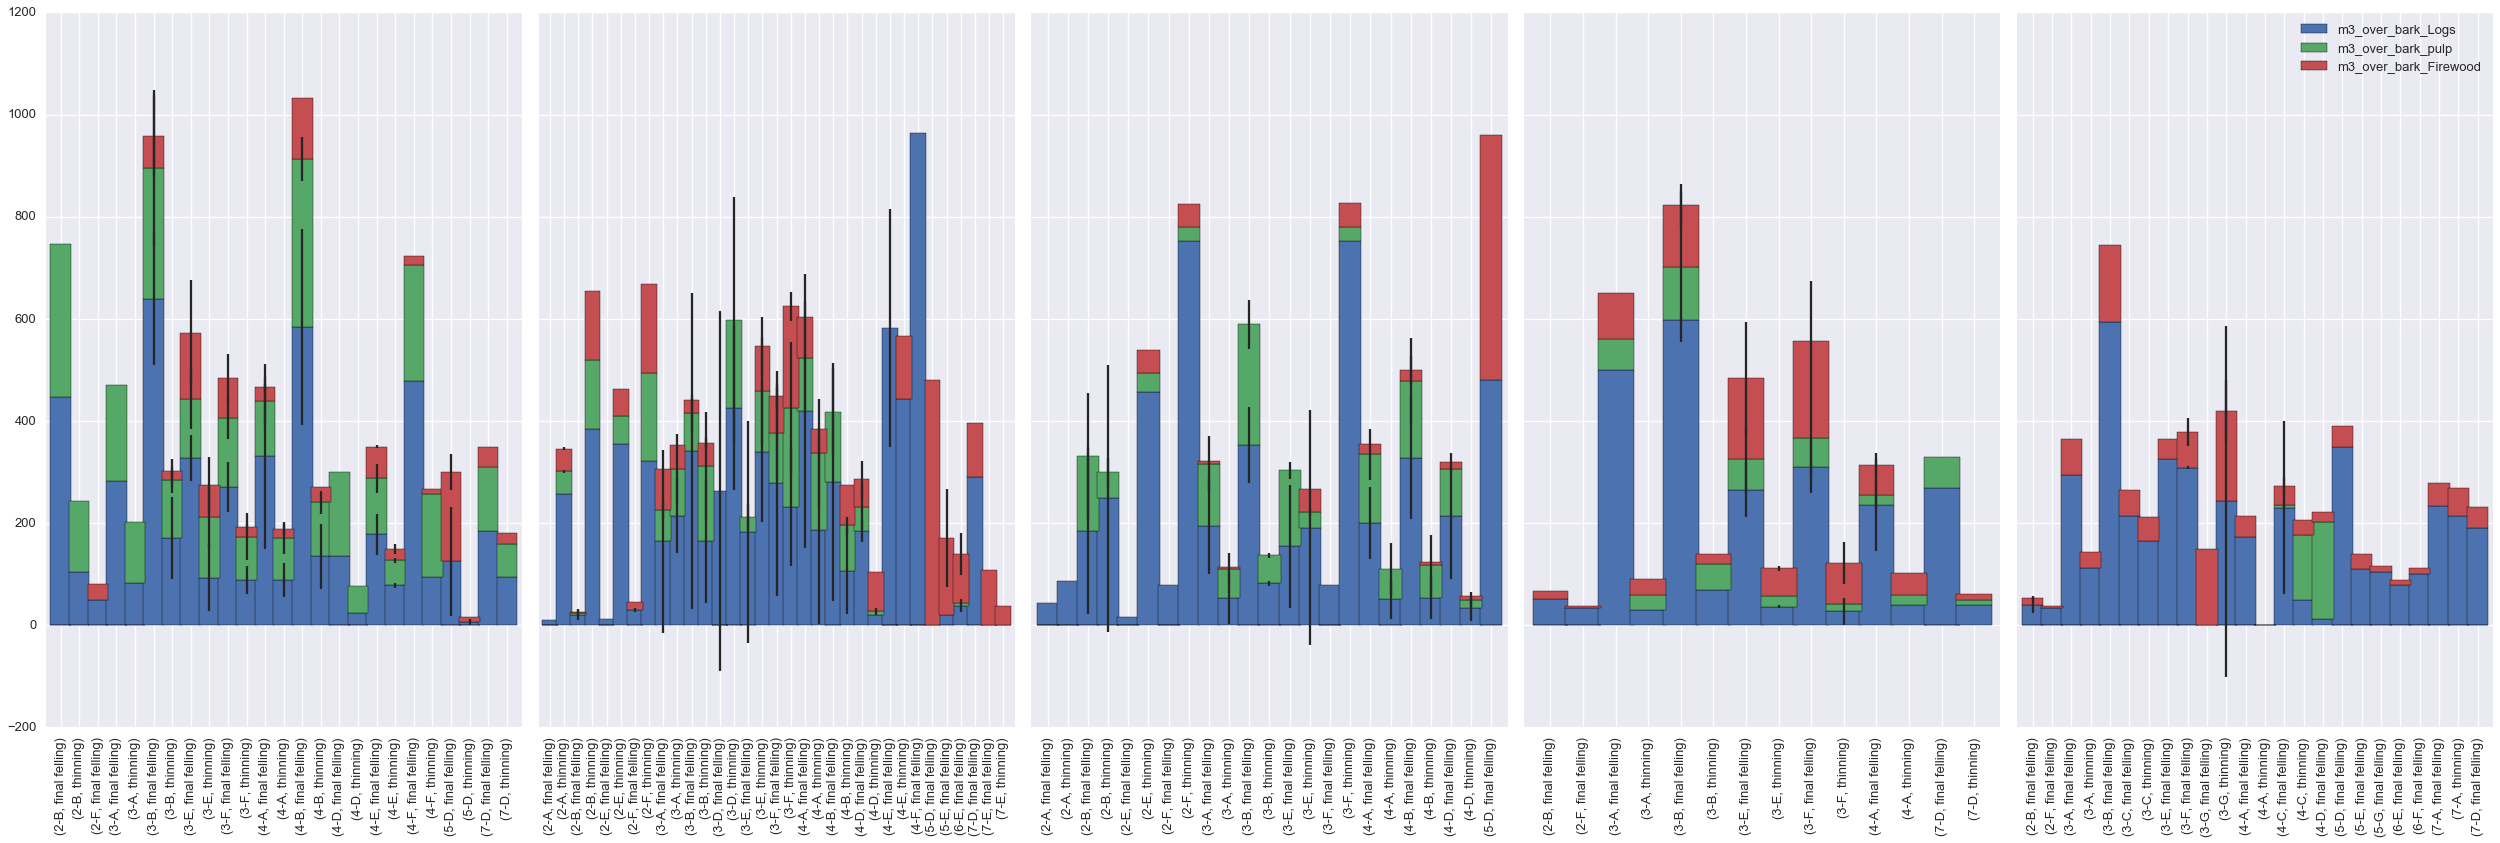

In [21]:
###########
#BY ECOREG#
###########


sns.set_context("talk",font_scale=1)
gr=gr_th_fel.groupby(['Ecore_WP5'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()

fig, axs = plt.subplots(nrows=1,ncols=gr.ngroups, sharey= True,figsize=(35, 12))

n=0
for name, group in gr:
    #regrup by fu and intervention
    sub_gr=group.groupby(['FU','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()
    #calculate means and stdevs
    means = sub_gr.mean()
    errors = sub_gr.std()
    p=means.plot.bar(stacked=True,yerr=errors,width=1.1, sort_columns=True,ax=axs[n],legend=False) #with yerr can add the bars
    
    axs[n].set_xlabel('') #remove x-axes name
    axs[n].set_aspect('auto')
    n+=1
plt.tight_layout() #reduce space between graphs
l = p.legend() #to show only one legend
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# plt.subplots_adjust(bottom=0.5, right=0.8, top=0.9)

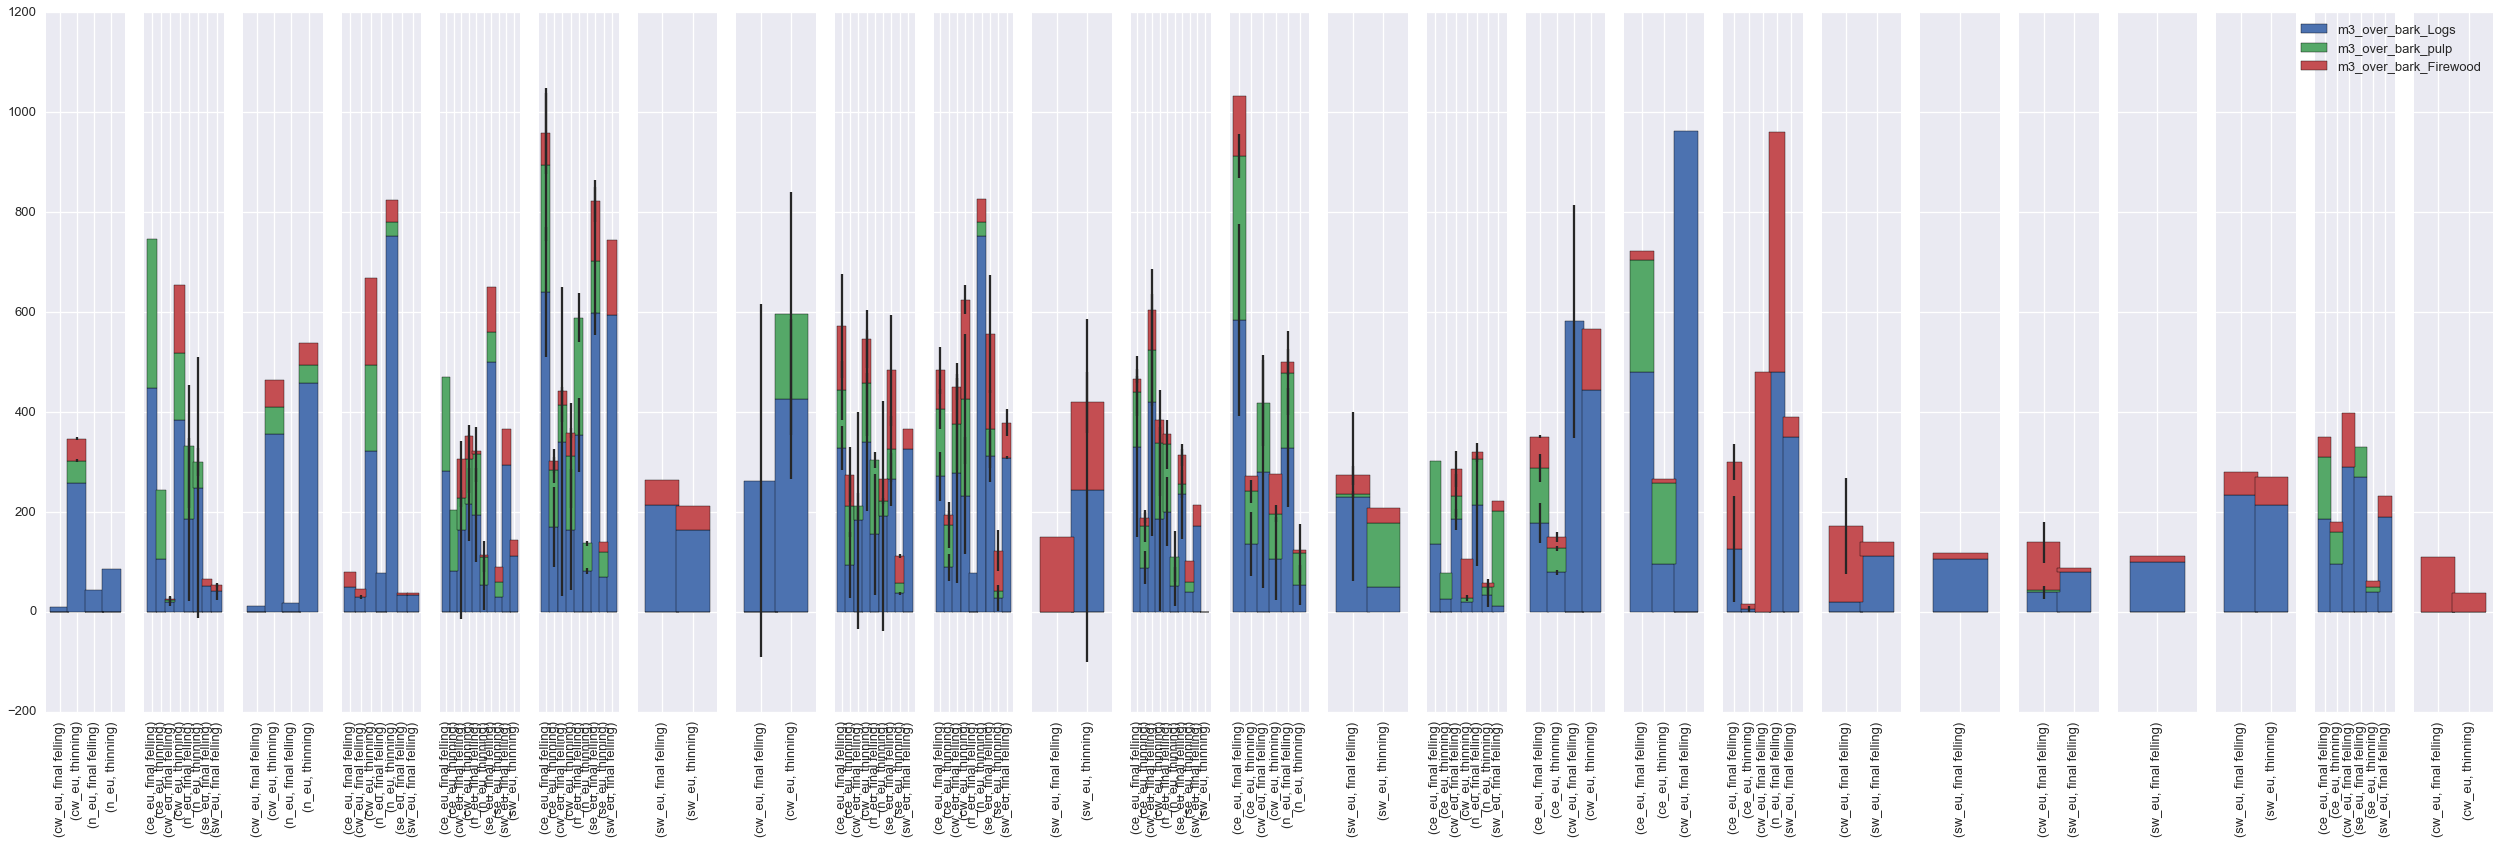

In [22]:
#######
#BY FU#
#######


sns.set_context("talk",font_scale=1)
gr=gr_th_fel.groupby(['FU'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()

fig, axs = plt.subplots(nrows=1,ncols=gr.ngroups, sharey= True,figsize=(35, 12))

n=0
for name, group in gr:
    #regrup by fu and intervention
    sub_gr=group.groupby(['Ecore_WP5','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()
    #calculate means and stdevs
    means = sub_gr.mean()
    errors = sub_gr.std()
    p=means.plot.bar(stacked=True,yerr=errors,width=1.1, sort_columns=True,ax=axs[n],legend=False) #with yerr can add the bars
    
    axs[n].set_xlabel('') #remove x-axes name
    n+=1
plt.tight_layout() #reduce space between graphs
l = p.legend() #to show only one legend
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# plt.subplots_adjust(bottom=0.5, right=0.8, top=0.9)

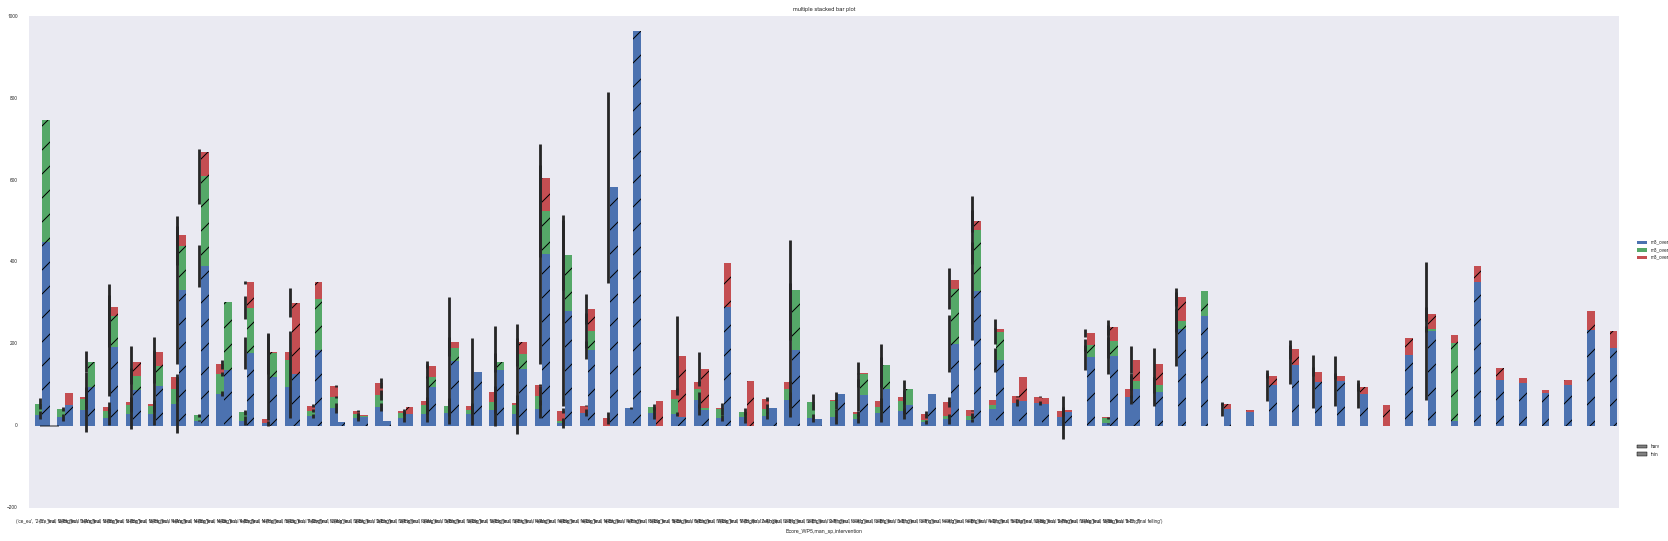

In [231]:
def plot_clustered_stacked(dfall,df_errors, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for (df,err) in zip(dfall,df_errors) : # added error
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      yerr=err,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col))
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

#group by eco,FU and interventions
th_val=sum_th_fel[sum_th_fel.intervention=='thinning'].groupby(['Ecore_WP5','FU','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()
fel_val=sum_th_fel[sum_th_fel.intervention=='final felling'].groupby(['Ecore_WP5','FU','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()

#calculate means and stdevs
th_means = th_val.mean()
th_errors = th_val.std()
fel_means = fel_val.mean()
fel_errors = fel_val.std()
sns.set_context("poster",font_scale=0.3)

# Then, just call :
plot_clustered_stacked([th_means, fel_means],[th_errors, fel_errors],["harv", "thin"])
plt.gcf().subplots_adjust(bottom=0.25) #to avoid that the bottom is cutted during the export
plt.gcf().set_size_inches(28.5, 10.5)
# plt.savefig('/home/giuseppec/Downloads/xi.png', dpi=500)

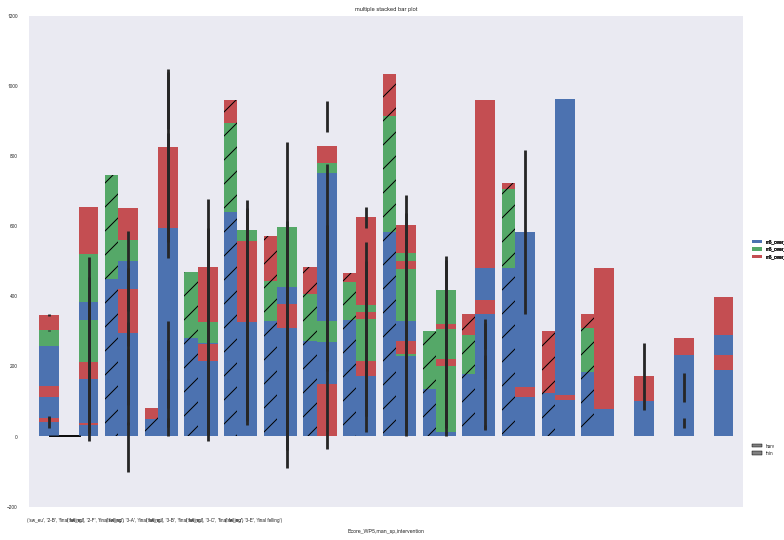

In [249]:
gr=gr_th_fel.groupby(['Ecore_WP5'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()

# fig, axs = plt.subplots(nrows=1,ncols=gr.ngroups, sharex= True, sharey= True)#,figsize=(35, 12))

n=0
for name, group in gr:


#group by eco,FU and interventions
    th_val=group[group.intervention=='thinning'].groupby(['Ecore_WP5','FU','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()
    fel_val=group[group.intervention=='final felling'].groupby(['Ecore_WP5','FU','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()

    #calculate means and stdevs
    th_means = th_val.mean()
    th_errors = th_val.std()
    fel_means = fel_val.mean()
    fel_errors = fel_val.std()
#     sns.set_context("poster",font_scale=0.3)
    
    
#     axs[n]
    
    # Then, just call :
    clu=plot_clustered_stacked([th_means, fel_means],[th_errors, fel_errors],["harv", "thin"])
#     plt.gcf().subplots_adjust(bottom=0.25) #to avoid that the bottom is cutted during the export
#     plt.gcf().set_size_inches(28.5, 10.5)
    # plt.savefig('/home/giuseppec/Downloads/xi.png', dpi=500)
    n+=1
# l = clu.legend() #to show only one legend

2 3 12


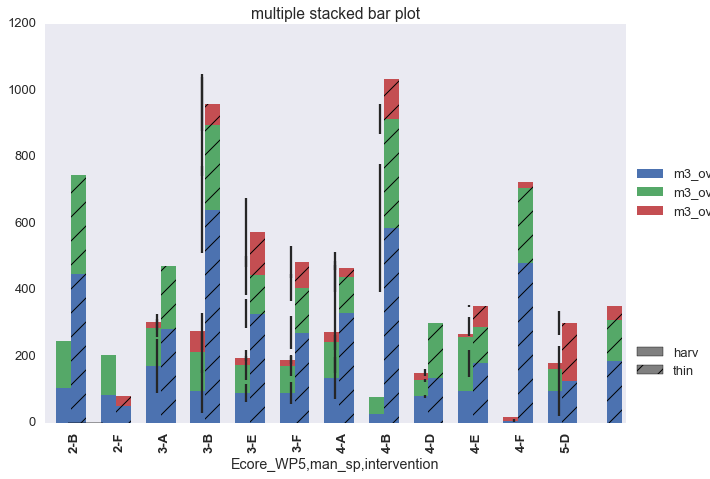

In [289]:
def plot_clustered_stacked(dfall,df_errors, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    print(n_df,n_col,n_ind)
    axe = plt.subplot(111)

    for (df,err) in zip(dfall,df_errors) : # added error
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      yerr=err,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col))
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels([x[1]for x in df.index], rotation = 90,weight='bold')
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

gr=gr_th_fel.groupby(['Ecore_WP5'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()

n=0
for name, group in gr:
    if n==0:
        #group by eco,FU and interventions
        th_val=group[group.intervention=='thinning'].groupby(['Ecore_WP5','FU','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()
        fel_val=group[group.intervention=='final felling'].groupby(['Ecore_WP5','FU','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()

        #calculate means and stdevs
        th_means = th_val.mean()
        th_errors = th_val.std()
        fel_means = fel_val.mean()
        fel_errors = fel_val.std()
    #     axs[n]
        clu=plot_clustered_stacked([th_means, fel_means],[th_errors, fel_errors],["harv", "thin"])
    #     plt.gcf().subplots_adjust(bottom=0.25) #to avoid that the bottom is cutted during the export
    #     plt.gcf().set_size_inches(28.5, 10.5)
        # plt.savefig('/home/giuseppec/Downloads/xi.png', dpi=500)

    # l = clu.legend() #to show only one legend
    else:
        continue
    n+=1


    # gr.get_group('ce_eu')

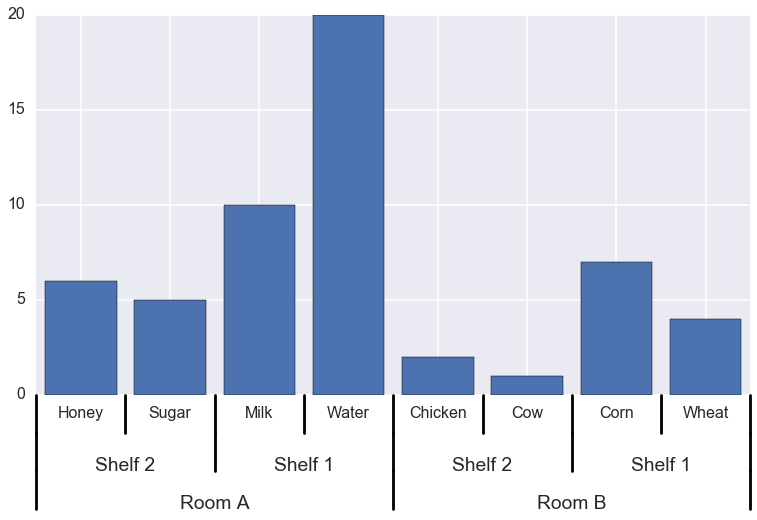

In [57]:
from matplotlib import pyplot as plt

def mk_groups(data):
    try:
        newdata = data.items()
    except:
        return

    thisgroup = []
    groups = []
    for key, value in newdata:
        newgroups = mk_groups(value)
        if newgroups is None:
            thisgroup.append((key, value))
        else:
            thisgroup.append((key, len(newgroups[-1])))
            if groups:
                groups = [g + n for n, g in zip(newgroups, groups)]
            else:
                groups = newgroups
    return [thisgroup] + groups

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_group_bar(ax, data):
    groups = mk_groups(data)
    xy = groups.pop()
    x, y = zip(*xy)
    ly = len(y)
    xticks = range(1, ly + 1)

    ax.bar(xticks, y, align='center')
    ax.set_xticks(xticks)
    ax.set_xticklabels(x)
    ax.set_xlim(.5, ly + .5)
    ax.yaxis.grid(True)

    scale = 1. / ly
    for pos in range(ly + 1):
        add_line(ax, pos * scale, -.1)
    ypos = -.2
    while groups:
        group = groups.pop()
        pos = 0
        for label, rpos in group:
            lxpos = (pos + .5 * rpos) * scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos * scale, ypos)
            pos += rpos
        add_line(ax, pos * scale, ypos)
        ypos -= .1

data = {'Room A':
           {'Shelf 1':
               {'Milk': 10,
                'Water': 20},
            'Shelf 2':
               {'Sugar': 5,
                'Honey': 6}
           },
        'Room B':
           {'Shelf 1':
               {'Wheat': 4,
                'Corn': 7},
            'Shelf 2':
               {'Chicken': 2,
                'Cow': 1}
           }
       }
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
label_group_bar(ax, data)
fig.subplots_adjust(bottom=0.3)
# fig.savefig('label_group_bar_example.png')

In [297]:
#overbark thinning adn final felling summed
vol_th_fel=harv_no_plan.copy(deep=True)

vol_th_fel['id']=vol_th_fel['FU']+'_'+vol_th_fel['Country']
vol_th_fel=pd.melt(vol_th_fel, id_vars=['id','intervention'],value_vars=[
                    'm3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood'],value_name='harvest').sort_values(['id','intervention']) 

%R -i vol_th_fel # send to R

In [300]:
%%R 

# plot the #overbark thinning adn final felling summed

library(ggplot2)
ggplot(vol_th_fel, aes(x = intervention, y = harvest, fill = variable)) + 
geom_bar(stat = 'identity', position = 'stack') + facet_grid(~ id) +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + # make the x label vertical
theme(strip.text.x = element_text(size = 10, angle = 90)) # make the facet label vertical
# ggsave('/home/giuseppec/Downloads/fell_thin_sum.png', width = 200, height = 15, units = "cm",limitsize = FALSE)

In [293]:
# def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
#     """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
# labels is a list of the names of the dataframe, used for the legend
# title is a string for the title of the plot
# H is the hatch used for identification of the different dataframe"""

#     n_df = len(dfall)
#     n_col = len(dfall[0].columns) 
#     n_ind = len(dfall[0].index)
#     axe = plt.subplot(111)

#     for df in dfall : # for each data frame
#         axe = df.plot(kind="bar",
#                       linewidth=0,
#                       stacked=True,
#                       ax=axe,
#                       legend=False,
#                       grid=False,
#                       **kwargs)  # make bar plots

#     h,l = axe.get_legend_handles_labels() # get the handles we want to modify
#     for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
#         for j, pa in enumerate(h[i:i+n_col]):
#             for rect in pa.patches: # for each index
#                 rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
#                 rect.set_hatch(H * int(i / n_col))
#                 rect.set_width(1 / float(n_df + 1))

#     axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
#     axe.set_xticklabels(df.index, rotation = 0)
#     axe.set_title(title)

#     # Add invisible data to add another legend
#     n=[]        
#     for i in range(n_df):
#         n.append(axe.bar(0, 0, color="gray", hatch=H * i))

#     l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
#     if labels is not None:
#         l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
#     axe.add_artist(l1)
#     return axe

# # create fake dataframes
# df1 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"],
#                    columns=["I", "J", "K", "L", "M"])
# df2 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"],
#                    columns=["I", "J", "K", "L", "M"])
# df3 = pd.DataFrame(np.random.rand(4, 5),
#                    index=["A", "B", "C", "D"], 
#                    columns=["I", "J", "K", "L", "M"])

# sns.set_context("poster",font_scale=0.3)

# # Then, just call :
# plot_clustered_stacked([sta, vol_th],["harv", "thin"])
# plt.gcf().subplots_adjust(bottom=0.25) #to avoid that the bottom is cutted during the export
# plt.gcf().set_size_inches(18.5, 10.5)
# # plt.savefig('/home/giuseppec/Downloads/xi.png', dpi=500)

In [108]:
# bubble.iplot(kind='bubble3d',
#              z='Ecore_WP5',
#              x='Management_system',
#              y='Species_group',
#              size='count',
#              categories='Main_equip',
#              title='Cufflinks - Scatter 3D Chart',
#              opacity=1
#             )


In [37]:
# trace1 = Scatter3d(
#     x=bubble['Ecore_WP5'],
#     y=bubble['Management_system'],
#     z=bubble['Species_group'],
# #     text=bubble['country'][750:1500],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         sizeref=4,
#         size=bubble['count'],
# #         colorscale = 'Viridis',
#         line=dict(color='rgb(140, 140, 170)')
#     )
# )

# data=[trace1]
# layout=dict(height=800, width=800, title='Examining Population and Life Expectancy Over Time')
# fig=dict(data=data, layout=layout)
# iplot(fig) #no figname, no py.

In [23]:
# #to grupby and count
# bubble=combined[['Ecore_WP5','Country','Management_system','Species_group',
#                  'Type_of_intervention','Main_equip','Add_equip','intervention']]
# bubble=pd.DataFrame({'count' : bubble.groupby(['Ecore_WP5','Management_system','Species_group',
#                                          'intervention','Main_equip']).size()}).reset_index()
# #filter for intervention and machinery
# filt_int=['final felling']
# filt_mach=['chainsaw']
# bubble=bubble[bubble.Main_equip.isin(filt_mach) & bubble.intervention.isin(filt_int)]
# bubble

In [25]:
# #to grupby and count
# bubble=combined[['Ecore_WP5','Country','Management_system','Species_group',
#                  'Type_of_intervention','Main_equip','Add_equip','intervention']]
# bubble=pd.DataFrame({'count' : bubble.groupby(['Ecore_WP5','Management_system','Species_group',
#                                          'intervention','Main_equip']).size()}).reset_index()
# #filter for intervention and machinery
# filt_int=['final felling']
# filt_mach=['harvester']
# bubble=bubble[bubble.Main_equip.isin(filt_mach) & bubble.intervention.isin(filt_int)]
# bubble

In [26]:
# trace1 = Scatter3d(
#     x=bubble['Ecore_WP5'],
#     y=bubble['Management_system'],
#     z=bubble['Species_group'],
# #     text=bubble['country'][750:1500],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         sizeref=0,
#         size=bubble['count']*5,
# #         colorscale = 'Viridis',
#         line=dict(color='rgb(140, 140, 170)')
#     )
# )

# data=[trace1]
# layout=dict(height=600, width=600, title='to fill')
# fig=dict(data=data, layout=layout)
# py.iplot(fig, filename='3DBubble')

In [36]:
#to grupby and count
viol=combined[['Ecore_WP5','Country','Management_system','Species_group',
                 'Type_of_intervention','Main_equip','Add_equip','intervention']]
viol=pd.DataFrame({'count' : viol.groupby(['Ecore_WP5','Management_system','Species_group',
                                         'intervention','Main_equip']).size()}).reset_index()
#filter for intervention and machinery
filt_int=['final felling']
filt_mach=['chainsaw','harvester','feller buncher']
viol=viol[viol.Main_equip.isin(filt_mach) & viol.intervention.isin(filt_int)]
# viol

In [254]:
sorted(list(combined.intervention.unique()))

[nan, u'final felling', u'planting', u'thinning']

In [35]:
#to check the unmatching between finalissimo and the originals

all_code=alltog[[
'ID',
'Respondent_ID',
'Country',
'Management_system',
'Species_group',
        
'Type_of_intervention',
'Main_equip',
'Add_equip',

]]

fin_code=finalis[[
'ID',
'Respondent_ID',
'Country',
'Management_system',
'Species_group',
'second_additional_equipment',
        
]]



both=all_code.merge(fin_code,how='outer',on=['ID','Respondent_ID','Country', u'Management_system', u'Species_group'],indicator=True)

# both.ix[both.m3_over_bark_Logs_x != both.m3_over_bark_Logs_y, 'differences'] = "DIFFERENT"

# both.sort_values(['differences','m3_over_bark_Logs_x','m3_over_bark_Logs_y'],ascending=[1,0,0]).reset_index()

# both.sort_values(['second_additional_equipment'])



In [208]:

# df = pd.concat([alltog[['Country', u'Management_system', u'Species_group','interv_num']],
#                 finalis[['Country', u'Management_system', u'Species_group','interv_num']]])
# df = df.reset_index(drop=True)
# df_gpby = df.groupby(list(df.columns))
# idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
# df.reindex(idx)

In [ ]:
# WHAT TO DO WITH if_other_specify_interv

[u'1 cutting, volume reduction to 0.6', #can be taken out 99%
 u'1 cutting, volume reduction to 0.7', #can be taken out 99%
 u'1 cutting, volume reduction to 0.8',#can be taken out 99%
 u'2 cutting, volume reduction to 0.2',#can be taken out 99%
 u'2 cutting, volume reduction to 0.3',#can be taken out 99%
 u'2 cutting, volume reduction to 0.4',#can be taken out 99%
 u'2 cutting, volume reduction to 0.5',#can be taken out 99%
 u'2 cutting, volume reduction to 0.6',#can be taken out 99%
 u'3 cutting, volume reduction to 0.5',#can be taken out 99%
 u'3 final cutting', #check
 u'bark / cork harvesting', CHANGED
 u'bucking followed by timber sale at a forest timber yard', #can be taken out 99%
 u'cleaning forest area from branches', CHANGED
 u'early cleaning',CHANGED
 u'early cleaning (respacing)', CHANGED
 u'early tending',CHANGED
 u'extraction of felled trees', #can be taken out 99%
 u'final cutting',  #check
 u'from above', #can be taken out 99%
 u'from below', #can be taken out 99%
 u'hauling and shredding of thinning material', #can be taken out 99%
 u'it was extraction of felled trees (i.e hauling)',#check what to do with this i.e. if to keep separate or not
 u'it was hauling', #check what to do with this i.e. if to keep separate or not, same for the 3 below
 u'it was hauling-This icludes all skidding operation during stand development - all thinings an',
 u'it was hauling-This icludes all skidding operation during stand development - all thinings and all final cuttings',
 u'It was hauling-This icludes all skidding operation during stand development - all thinings and all final cuttings',
 u'late cleaning',CHANGED
 u'late cleaning (respacing)',CHANGED
 u'late tending',CHANGED
 u'mechanical processing of logging waste (chips - biomass for bioenergy)',  CHANGED
 u'neutral, this includes several clearings during the pre-defined period',#can be taken out 99%, unless we want to go into details more
 u'pruning',  CHANGED
 u'ripping&disking',  CHANGED
 u'this includes several clearings during the pre-defined period',#can be taken out 99%, unless we want to go into details more
 u'This includes all four staged of shwelterwood felling',#can be taken out 99%, unless we want to go into details more
 u'This includes all four stages of shwelterwood felling.',#can be taken out 99%, unless we want to go into details more
 u'This includes all thinnings operations for one stand',#can be taken out 99%, unless we want to go into details more
 u'timber sale in the forest for self-preparation of firewood'#TAKE OUT ALL THE ROWS
]